In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def find_rms(data):
    return np.sqrt(np.mean(data, axis=1)**2).flatten()

In [3]:
P2H= np.loadtxt('../Data/P2H_rms_raw_data.txt')
BB= np.loadtxt('../Data/BB_rms_raw_data.txt')

In [4]:
P2H_long= np.loadtxt('../Data/P2H_rms_raw_data_long.txt')
BB_long= np.loadtxt('../Data/BB_rms_raw_data_long.txt')

In [5]:
P2H_timeav, P2H_x,P2H_errtime= (P2H[0].reshape(7,20), P2H[1].reshape(7,20), P2H[2].reshape(7,20))
BB_timeav, BB_x,BB_errtime= (BB[0].reshape(7,20), BB[1].reshape(7,20), BB[2].reshape(7,20))

In [6]:
P2H_timeav_long, P2H_x_long,P2H_errtime_long= (P2H_long[0].reshape(7,20), P2H_long[1].reshape(7,20), P2H_long[2].reshape(7,20))
BB_timeav_long, BB_x_long,BB_errtime_long= (BB_long[0].reshape(7,20), BB_long[1].reshape(7,20), BB_long[2].reshape(7,20))

In [7]:
P2H_rms= find_rms(P2H_timeav)
P2H_xaxis_rms= P2H_x.T[0]

BB_rms= find_rms(BB_timeav)
BB_xaxis_rms= BB_x.T[0]

In [8]:
P2H_rms_long= find_rms(P2H_timeav_long)
P2H_xaxis_rms_long= P2H_x_long.T[0]

BB_rms_long= find_rms(BB_timeav_long)
BB_xaxis_rms_long= BB_x_long.T[0]

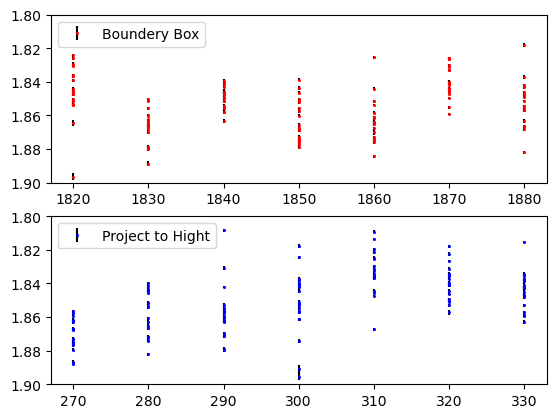

In [9]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.errorbar(P2H_x.flatten(), P2H_timeav.flatten(), yerr=P2H_errtime.flatten(), fmt='rx', ecolor='k', markersize= 1.5, label='Boundery Box')
ax1.set_ylim((1.9,1.8))
ax1.legend(loc='upper left')
ax2.errorbar(BB_x.flatten(), BB_timeav.flatten(), yerr=BB_errtime.flatten(), fmt='bx', ecolor='k', markersize= 1.5, label= 'Project to Hight')
ax2.set_ylim((1.9,1.8))
ax2.legend(loc='upper left')

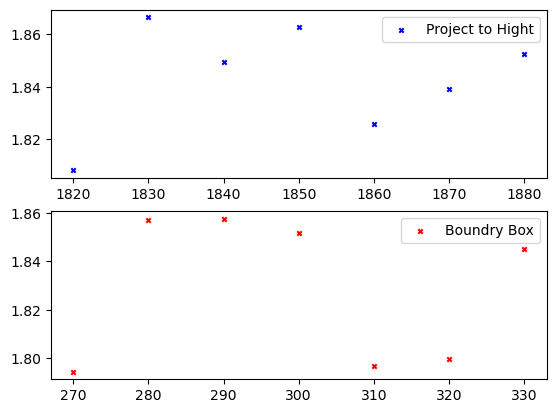

In [10]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.scatter(P2H_xaxis_rms, P2H_rms, marker='x', c='b', s= 10, label= 'Project to Hight')
ax1.legend(loc='upper right')

ax2.scatter(BB_xaxis_rms, BB_rms, marker='x', c='r', s= 10, label= 'Boundry Box')
ax2.legend(loc='upper right')

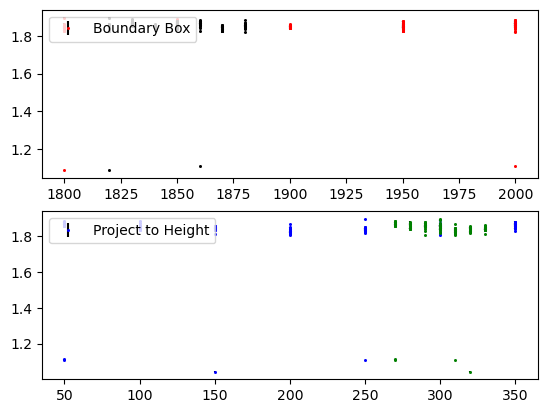

In [11]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.errorbar(P2H_x_long.flatten(), P2H_timeav_long.flatten(), yerr=P2H_errtime_long.flatten(), fmt='rx', ecolor='k', markersize= 1.5, label='Boundary Box')
ax1.errorbar(P2H_x.flatten(), P2H_timeav.flatten(), yerr=P2H_errtime.flatten(), fmt='kx', ecolor='k', markersize= 1.5)
ax1.legend(loc='upper left')
ax2.errorbar(BB_x_long.flatten(), BB_timeav_long.flatten(), yerr=BB_errtime_long.flatten(), fmt='bx', ecolor='k', markersize= 1.5, label= 'Project to Height')
ax2.errorbar(BB_x.flatten(), BB_timeav.flatten(), yerr=BB_errtime.flatten(), fmt='gx', ecolor='k', markersize= 1.5)
ax2.legend(loc='upper left')

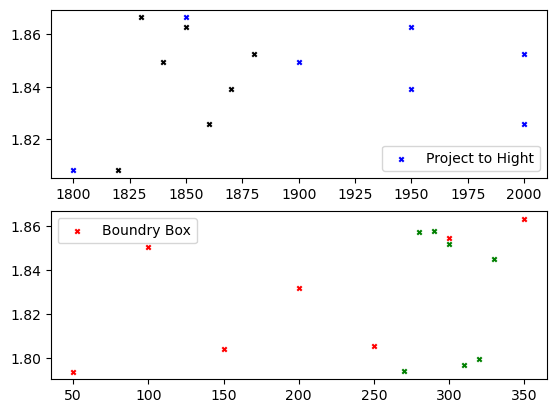

In [12]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.scatter(P2H_xaxis_rms_long, P2H_rms_long, marker='x', c='b', s= 10, label= 'Project to Hight')
ax1.scatter(P2H_xaxis_rms, P2H_rms, marker='x', c='k', s= 10)
ax1.legend(loc='lower right')

ax2.scatter(BB_xaxis_rms_long, BB_rms_long, marker='x', c='r', s= 10, label= 'Boundry Box')
ax2.scatter(BB_xaxis_rms, BB_rms, marker='x', c='g', s= 10)
ax2.legend(loc='upper left')

The pearson statistic for short is -0.614 with a p value of 0.0194
The pearson statistic for long is -0.528 with a p value of 0.0521


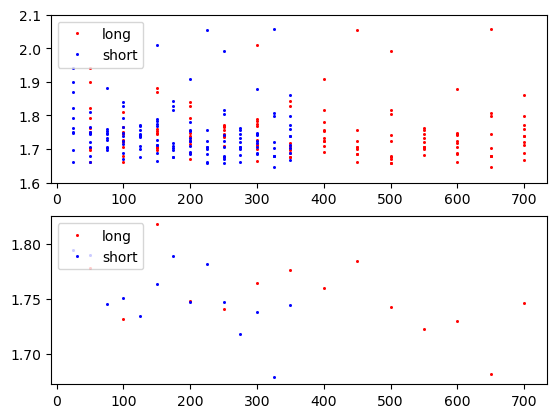

In [13]:
gen_long= np.loadtxt('../Data/BB_gen_long_raw_data.txt')
gen_short= np.loadtxt('../Data/BB_gen_short_raw_data.txt')

gen_timeav_long, gen_x_long,gen_errtime_long= (gen_long[0].reshape(14,10), gen_long[1].reshape(14,10), gen_long[2].reshape(14,10))
gen_timeav_short, gen_x_short,gen_errtime_short= (gen_short[0].reshape(14,10), gen_short[1].reshape(14,10), gen_short[2].reshape(14,10))

fig, (ax1, ax2)=plt.subplots(2,1)
ax1.errorbar(gen_x_long.flatten(), gen_timeav_long.flatten(), fmt='rx', ecolor='k', markersize= 1.5, label='long')
ax1.errorbar(gen_x_short.flatten(), gen_timeav_short.flatten(), fmt='bx', ecolor='k', markersize= 1.5, label= 'short')
ax1.legend(loc='upper left')
ax1.set_ylim((1.6,2.1))

corr_long= stats.pearsonr(np.average(gen_timeav_long, axis=1).flatten(), np.average(gen_x_long, axis= 1).flatten())
corr_short= stats.pearsonr(np.average(gen_timeav_short, axis= 1).flatten(), np.average(gen_x_short, axis= 1).flatten())

ax2.errorbar(np.average(gen_x_long, axis= 1).flatten(), np.average(gen_timeav_long, axis=1).flatten(), fmt='rx', ecolor='k', markersize= 1.5, label='long')
ax2.errorbar(np.average(gen_x_short, axis= 1).flatten(), np.average(gen_timeav_short, axis=1).flatten(), fmt='bx', ecolor='k', markersize= 1.5, label= 'short')
ax2.legend(loc='upper left')

print(f'The pearson statistic for short is {corr_short.statistic:.3} with a p value of {corr_short.pvalue:.3}')
print(f'The pearson statistic for long is {corr_long.statistic:.3} with a p value of {corr_long.pvalue:.3}')

The pearson statistic for short is -0.385 with a p value of 0.174
The pearson statistic for long is 0.721 with a p value of 0.00365


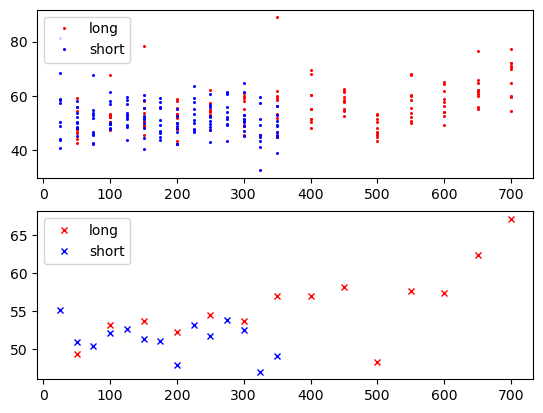

In [14]:
g4_long= np.loadtxt('../Data/BB_g4_long_raw_data.txt')
g4_short= np.loadtxt('../Data/BB_g4_short_raw_data.txt')

g4_timeav_long, g4_x_long,g4_errtime_long= (g4_long[0].reshape(14,10), g4_long[1].reshape(14,10), g4_long[2].reshape(14,10))
g4_timeav_short, g4_x_short,g4_errtime_short= (g4_short[0].reshape(14,10), g4_short[1].reshape(14,10), g4_short[2].reshape(14,10))

fig, (ax1, ax2)=plt.subplots(2,1)
ax1.errorbar(g4_x_long.flatten(), g4_timeav_long.flatten(), fmt='rx', ecolor='k', markersize= 1.5, label='long')
ax1.errorbar(g4_x_short.flatten(), g4_timeav_short.flatten(), fmt='bx', ecolor='k', markersize= 1.5, label= 'short')
ax1.legend(loc='upper left')

ax2.errorbar(np.average(g4_x_long, axis= 1).flatten(), np.average(g4_timeav_long, axis=1).flatten(), fmt='rx', ecolor='k', markersize= 5, label='long')
ax2.errorbar(np.average(g4_x_short, axis= 1).flatten(), np.average(g4_timeav_short, axis=1).flatten(), fmt='bx', ecolor='k', markersize= 5, label= 'short')
ax2.legend(loc='upper left')

corr_long= stats.pearsonr(np.average(g4_timeav_long, axis=1).flatten(), np.average(g4_x_long, axis= 1).flatten())
corr_short= stats.pearsonr(np.average(g4_timeav_short, axis= 1).flatten(), np.average(g4_x_short, axis= 1).flatten())

print(f'The pearson statistic for short is {corr_short.statistic:.3} with a p value of {corr_short.pvalue:.3}')
print(f'The pearson statistic for long is {corr_long.statistic:.3} with a p value of {corr_long.pvalue:.3}')

The pearson statistic for short is 0.713 with a p value of 0.00423
The pearson statistic for long is 0.464 with a p value of 0.0947


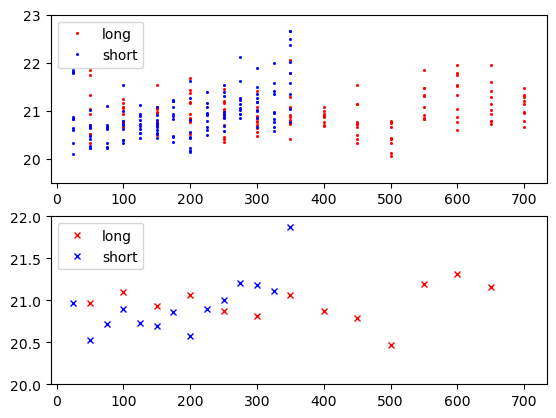

In [15]:
det_long= np.loadtxt('../Data/BB_det_long_raw_data.txt')
det_short= np.loadtxt('../Data/BB_det_short_raw_data.txt')

det_timeav_long, det_x_long,det_errtime_long= (det_long[0].reshape(14,10), det_long[1].reshape(14,10), det_long[2].reshape(14,10))
det_timeav_short, det_x_short,det_errtime_short= (det_short[0].reshape(14,10), det_short[1].reshape(14,10), det_short[2].reshape(14,10))

fig, (ax1,ax2)=plt.subplots(2,1)
ax1.errorbar(det_x_long.flatten(), det_timeav_long.flatten(), fmt='rx', ecolor='k', markersize= 1.5, label='long')
ax1.errorbar(det_x_short.flatten(), det_timeav_short.flatten(), fmt='bx', ecolor='k', markersize= 1.5, label= 'short')
ax1.legend(loc='upper left')
ax1.set_ylim((19.5,23))

ax2.errorbar(np.average(det_x_long, axis= 1).flatten(), np.average(det_timeav_long, axis=1).flatten(), fmt='rx', ecolor='k', markersize= 5, label='long')
ax2.errorbar(np.average(det_x_short, axis= 1).flatten(), np.average(det_timeav_short, axis=1).flatten(), fmt='bx', ecolor='k', markersize= 5, label= 'short')
ax2.legend(loc='upper left')
ax2.set_ylim((20,22))

corr_long= stats.pearsonr(np.average(det_timeav_long, axis=1).flatten(), np.average(det_x_long, axis= 1).flatten())
corr_short= stats.pearsonr(np.average(det_timeav_short, axis= 1).flatten(), np.average(det_x_short, axis= 1).flatten())

print(f'The pearson statistic for short is {corr_short.statistic:.3} with a p value of {corr_short.pvalue:.3}')
print(f'The pearson statistic for long is {corr_long.statistic:.3} with a p value of {corr_long.pvalue:.3}')